**Part 3. AI Agent 심화 프로젝트**

- Chapter 02. 추천시스템 Agent

    - **📒[실습]** Clip 03. 추천시스템 Agent (2)🗒️

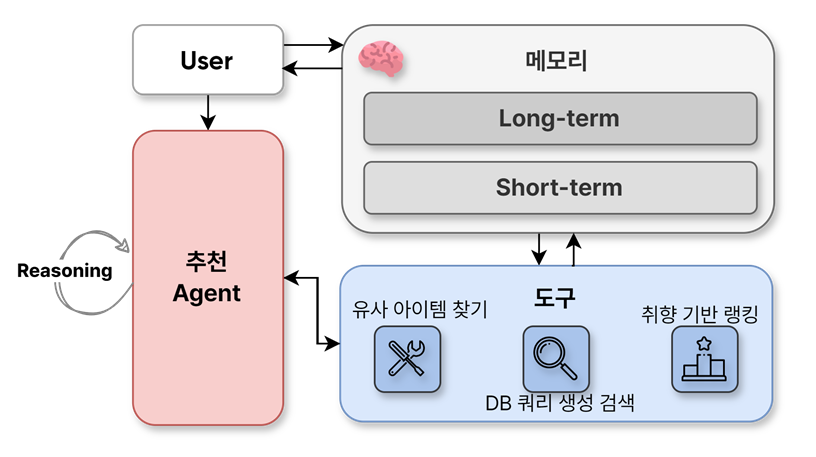

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

## 추천에 필요한 도구 설정

### 아이템 검색을 위한 데이터베이스 설정

https://amazon-reviews-2023.github.io/

In [1]:
import pandas as pd
import gzip

with gzip.open("meta_Movies_and_TV.jsonl.gz", "rt", encoding="utf-8") as f:
    df = pd.read_json(f, lines=True)

print(df.head())

  main_category                                              title  \
0   Prime Video                                               Glee   
1   Prime Video                                One Perfect Wedding   
2   Movies & TV  How to Make Animatronic Characters - Organic M...   
3   Prime Video             Ode to Joy: Beethoven's Symphony No. 9   
4   Prime Video                      Ben 10: Alien Force (Classic)   

               subtitle  average_rating  rating_number  \
0  UnentitledUnentitled             4.7         2004.0   
1                  None             3.0            6.0   
2                   NaN             5.0            7.0   
3                  None             4.3           35.0   
4  UnentitledUnentitled             4.7          360.0   

                                      features  \
0  [IMDb 6.8, 2013, 22 episodes, X-Ray, TV-14]   
1            [IMDb 6.1, 1 h 27 min, 2021, ALL]   
2                                           []   
3                      [1 h 26

In [2]:
df

,main_category,title,subtitle,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,author
0,Prime Video,Glee,UnentitledUnentitled,4.7,2004.0,"[IMDb 6.8, 2013, 22 episodes, X-Ray, TV-14]","[Entering its fourth season, this year the mem...",22.39,[{'360w': 'https://images-na.ssl-images-amazon...,[],None,"[Comedy, Drama, Arts, Entertainment, and Cultu...","{'Content advisory': ['Violence', 'substance u...",B00ABWKL3I,NaN,NaN
1,Prime Video,One Perfect Wedding,None,3.0,6.0,"[IMDb 6.1, 1 h 27 min, 2021, ALL]",[With her book tour in two weeks and his expan...,None,[{'360w': 'https://images-na.ssl-images-amazon...,[],None,"[Comedy, Drama, Romance]","{'Audio languages': ['English'], 'Subtitles': ...",B09WDLJ4HP,NaN,NaN
2,Movies & TV,How to Make Animatronic Characters - Organic M...,NaN,5.0,7.0,[],"[Product Description, In PART TWO of this incr...",64.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Rick Lazzarini (Actor), Stan Winston Scho...","[Movies & TV, Genre for Featured Categories, S...",{'Package Dimensions': '7.52 x 5.31 x 0.71 inc...,B00AHN851G,NaN,NaN
3,Prime Video,Ode to Joy: Beethoven's Symphony No. 9,None,4.3,35.0,"[1 h 26 min, 2015, ALL]",[This special Ode to Joy: Beethoven's Symphony...,5.99,[{'360w': 'https://m.media-amazon.com/images/G...,[],None,[Documentary],"{'Audio languages': ['English'], 'Subtitles': ...",B01G9ILXXE,NaN,NaN
4,Prime Video,Ben 10: Alien Force (Classic),UnentitledUnentitled,4.7,360.0,"[IMDb 7.3, 2008, 13 episodes, 7+]",[Itâ€™s hero time again for Ben as he saves th...,24.49,[{'360w': 'https://images-na.ssl-images-amazon...,[],None,"[Science Fiction, Comedy, Animation, Drama]","{'Audio languages': ['English'], 'Subtitles': ...",B009SIYXDA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748219,Prime Video,None,None,4.5,28.0,None,None,None,[{'360w': 'https://m.media-amazon.com/images/G...,[],None,None,"{'Content advisory': ['Violence', 'alcohol use...",B075DJ3B57,NaN,NaN
748220,Prime Video,None,None,4.8,211.0,None,None,None,[{'360w': 'https://m.media-amazon.com/images/G...,[],None,None,"{'Audio languages': ['English'], 'Subtitles': ...",B00BFDLKFK,NaN,NaN
748221,Prime Video,None,None,4.1,31.0,None,None,None,[{'360w': 'https://m.media-amazon.com/images/G...,[],None,None,"{'Audio languages': ['English'], 'Subtitles': ...",B00BRZNXPG,NaN,NaN
748222,Prime Video,None,None,4.4,117.0,None,None,None,[{'360w': 'https://images-na.ssl-images-amazon...,[],None,None,"{'Audio languages': ['English'], 'Subtitles': ...",B086LLNYBY,NaN,NaN


In [4]:
df["main_category"].unique()

array(['Prime Video', 'Movies & TV', 'Sports & Outdoors', 'Video Games',
       'Entertainment', 'Books', 'Toys & Games', None, 'Automotive',
       'AMAZON FASHION', 'Digital Music', 'Amazon Home',
       'Health & Personal Care', 'Home Audio & Theater', 'Software',
       'All Electronics', 'Musical Instruments', 'Office Products',
       'Grocery', 'Tools & Home Improvement', 'All Beauty',
       'Arts, Crafts & Sewing', 'Camera & Photo',
       'Industrial & Scientific', 'Computers',
       'Cell Phones & Accessories', 'Pet Supplies', 'GPS & Navigation',
       'Collectible Coins', 'Baby', 'Unique Finds'], dtype=object)

In [6]:
df["categories"]

0         [Comedy, Drama, Arts, Entertainment, and Cultu...
1                                  [Comedy, Drama, Romance]
2         [Movies & TV, Genre for Featured Categories, S...
3                                             [Documentary]
4               [Science Fiction, Comedy, Animation, Drama]
                                ...                        
748219                                                 None
748220                                                 None
748221                                                 None
748222                                                 None
748223    [Movies & TV, Featured Categories, DVD, Action...
Name: categories, Length: 748224, dtype: object

In [ ]:
import json

for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        df[col] = df[col].apply(json.dumps)

In [ ]:
import sqlite3

conn = sqlite3.connect("amazon_reviews.db")

df.to_sql("reviews", conn, if_exists="replace", index=False)

conn.close()

print("데이터가 SQLite DB 파일로 저장되었습니다.")

DB 불러와서 쿼리하기

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("amazon_reviews.db")

query_df = pd.read_sql("""
    SELECT *
    FROM reviews
    LIMIT 100;
""", conn)

conn.close()
query_df

,main_category,title,subtitle,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,author
0,Prime Video,Glee,UnentitledUnentitled,4.7,2004.0,"[""IMDb 6.8"", ""2013"", ""22 episodes"", ""X-Ray"", ""...","[""Entering its fourth season, this year the me...",22.39,"[{""360w"": ""https://images-na.ssl-images-amazon...",[],None,"[""Comedy"", ""Drama"", ""Arts, Entertainment, and ...","{""Content advisory"": [""Violence"", ""substance u...",B00ABWKL3I,None,NaN
1,Prime Video,One Perfect Wedding,None,3.0,6.0,"[""IMDb 6.1"", ""1 h 27 min"", ""2021"", ""ALL""]","[""With her book tour in two weeks and his expa...",None,"[{""360w"": ""https://images-na.ssl-images-amazon...",[],None,"[""Comedy"", ""Drama"", ""Romance""]","{""Audio languages"": [""English""], ""Subtitles"": ...",B09WDLJ4HP,None,NaN
2,Movies & TV,How to Make Animatronic Characters - Organic M...,None,5.0,7.0,[],"[""Product Description"", ""In PART TWO of this i...",64.99,"[{""thumb"": ""https://m.media-amazon.com/images/...",[],"Rick Lazzarini (Actor), Stan Winston Scho...","[""Movies & TV"", ""Genre for Featured Categories...","{""Package Dimensions"": ""7.52 x 5.31 x 0.71 inc...",B00AHN851G,None,NaN
3,Prime Video,Ode to Joy: Beethoven's Symphony No. 9,None,4.3,35.0,"[""1 h 26 min"", ""2015"", ""ALL""]","[""This special Ode to Joy: Beethoven's Symphon...",5.99,"[{""360w"": ""https://m.media-amazon.com/images/G...",[],None,"[""Documentary""]","{""Audio languages"": [""English""], ""Subtitles"": ...",B01G9ILXXE,None,NaN
4,Prime Video,Ben 10: Alien Force (Classic),UnentitledUnentitled,4.7,360.0,"[""IMDb 7.3"", ""2008"", ""13 episodes"", ""7+""]","[""It\u00e2\u20ac\u2122s hero time again for Be...",24.49,"[{""360w"": ""https://images-na.ssl-images-amazon...",[],None,"[""Science Fiction"", ""Comedy"", ""Animation"", ""Dr...","{""Audio languages"": [""English""], ""Subtitles"": ...",B009SIYXDA,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Movies & TV,The Roman Mysteries (Season 2) - 2-DVD Set ( T...,None,4.6,28.0,[],"[""Australia released, PAL/Region 4 DVD: it WIL...",21.98,"[{""thumb"": ""https://m.media-amazon.com/images/...",[],"Eli Machover (Actor, Host), Harry Stott ...","[""Movies & TV"", ""Genre for Featured Categories...","{""MPAA rating"": ""Unrated (Not Rated)"", ""Packag...",B00DUL4ZVG,None,NaN
96,Movies & TV,"The Reunion Party 2004, Featuring Former Soul ...",None,3.0,4.0,[],"[""This DVD is of the Reunion Party for all Sou...",None,"[{""thumb"": ""https://m.media-amazon.com/images/...",[],"Michelle Stevenson (Director), Sharon Hil...","[""Movies & TV"", ""African American Cinema""]","{""MPAA rating"": ""G (General Audience)"", ""Item ...",B000M6QR04,None,NaN
97,Prime Video,The Hot Chick,None,4.7,8505.0,"[""IMDb 5.5"", ""1 h 44 min"", ""2002"", ""X-Ray"", ""P...","[""HD. A curse turns the hottest, most popular ...",17.99,"[{""360w"": ""https://images-na.ssl-images-amazon...",[],None,"[""Fantasy"", ""Comedy"", ""Coarse"", ""Outlandish""]","{""Content advisory"": [""Violence"", ""alcohol use...",B0060D2SU6,None,NaN
98,Prime Video,Unforgettable,None,4.5,268.0,"[""IMDb 6.0"", ""1 h 56 min"", ""1996"", ""R""]","[""A forensics expert (Ray Liotta) is thrust in...",14.99,"[{""360w"": ""https://images-na.ssl-images-amazon...",[],None,"[""Science Fiction"", ""Suspense"", ""Cerebral"", ""D...","{""Audio languages"": [""English""], ""Subtitles"": ...",B00A2YA2KC,None,NaN


### 1️⃣ 검색 모듈 : 아이템 유사도 기반 DB 검색

: 다중 조건을 결합한 아이템 유사도 검색을 위한 SQL 쿼리

In [3]:
import json
from langchain_core.tools import tool

@tool
def find_similar_items(
    reference_item,
    price_min=None,
    price_max=None,
    limit=10,
):
    """
    Find similar items based on a reference item using multiple similarity criteria.
    
    This tool analyzes a reference item's characteristics (category, price) and finds 
    similar products using category matching, and price range filtering.
    When only reference_item is provided, the tool automatically uses that item's category and 
    price range (±20%) as search criteria.

    Args:
        reference_item (str): Name/title of the reference item to find similar products for
        price_min (float, optional): Minimum price filter (defaults to 80% of reference item's price)
        price_max (float, optional): Maximum price filter (defaults to 120% of reference item's price)
        limit (int, optional): Maximum number of similar items to return (default: 10)
    
    Returns:
        DataFrame with similar items ranked by category overlap and ratings.
    
    Example usage:
        - find_similar_items(reference_item="Glee") 
        - find_similar_items(reference_item="iPhone 13", price_max=800)
    """
    conn = sqlite3.connect("amazon_reviews.db")

    # -------------------------
    # | 참조 아이템 정보 가져오기 |
    # -------------------------
    ref_info = {}
    ref_categories = []
    if reference_item:
        ref_query = """SELECT main_category, categories, price
                     FROM reviews 
                     WHERE title = ? LIMIT 1"""
        ref_result = pd.read_sql(ref_query, conn, params=[reference_item])

        if not ref_result.empty:
            ref_info["main_category"] = ref_result.iloc[0]["main_category"]
            ref_info["categories"] = ref_result.iloc[0]["categories"]
            ref_info["price"] = ref_result.iloc[0]["price"]

            main_category = ref_info["main_category"]
            
            if ref_info["categories"] != "None" and ref_info["categories"] is not None:
                try:
                    categories = json.loads(ref_info["categories"])
                    if not isinstance(ref_categories, list):
                        categories = []
                except:
                    categories = []

            if (price_min is None or price_max is None) and ref_info["price"] != "None":
                try:
                    price_value = ref_info["price"]
                    
                    if isinstance(price_value, (int, float)):
                        price = float(price_value)
                    else:
                        price_str = str(price_value).replace("$", "").replace(",", "").strip()
                        price = float(price_str)
                    
                    if price_min is None:
                        price_min = price * 0.8
                    if price_max is None:
                        price_max = price * 1.2 
                except (ValueError, TypeError):
                    pass
        else:   
            raise ValueError(f"Reference item '{reference_item}' not found in the database.")

    # ----------------
    # | 기본 쿼리 구성 |
    # ----------------
    query_parts = [
        "SELECT DISTINCT title, main_category, categories, average_rating, price FROM reviews"
    ]
    where_clauses = []
    params = []

    # ----------------
    # | WHERE 절 구성 |
    # ----------------
    if reference_item:
        where_clauses.append("title != ?")
        params.append(reference_item)

    if main_category:
        where_clauses.append("main_category = ?")
        params.append(main_category)

    if price_min is not None:
        where_clauses.append(
            "CAST(REPLACE(REPLACE(price, '$', ''), ',', '') AS REAL) >= ?"
        )
        params.append(price_min)

    if price_max is not None:
        where_clauses.append(
            "CAST(REPLACE(REPLACE(price, '$', ''), ',', '') AS REAL) <= ?"
        )
        params.append(price_max)

    if categories and isinstance(categories, list):
        category_conditions = []
        for category in categories:
            category_conditions.append("categories LIKE ?")
            params.append(f"%{category}%")
        if category_conditions:
            where_clauses.append(
                f"({' OR '.join(category_conditions)})"
            )

    if where_clauses:
        query_parts.append("WHERE " + " AND ".join(where_clauses))


    query_parts.append("ORDER BY average_rating DESC")
    query_parts.append(f"LIMIT {limit * 10}")
    
    final_query = " ".join(query_parts)
    candidates = pd.read_sql(final_query, conn, params=params)
    
    # 카테고리 겹침 수 계산
    candidates["category_overlap"] = 0
    if categories:
        def count_category_overlap(cat_json):
            if cat_json == "None" or cat_json is None:
                return 0
            try:
                item_categories = json.loads(cat_json)
                if not isinstance(item_categories, list):
                    return 0
                return len(set(item_categories).intersection(set(categories)))
            except:
                return 0
        
        candidates["category_overlap"] = candidates["categories"].apply(count_category_overlap)
    
    # 정렬 순서: 카테고리 겹침 수(내림차순) -> 평점(내림차순)
    results = candidates.sort_values(
        ["category_overlap", "average_rating"], 
        ascending=[False, False]
    ).head(limit)

    conn.close()
    return results

In [4]:
tool_response = find_similar_items.invoke({"reference_item": "Glee", "limit": 5})

In [5]:
tool_response

,title,main_category,categories,average_rating,price,category_overlap
0,Lovers of Hate,Prime Video,"[""Comedy"", ""Drama"", ""Arts, Entertainment, and ...",5.0,19.99,3
12,Dog With A Blog,Prime Video,"[""Comedy"", ""Drama"", ""Kids"", ""Fantasy""]",5.0,19.99,2
15,Peacemaker,Prime Video,"[""Comedy"", ""Drama""]",5.0,23.92,2
22,Castle,Prime Video,"[""Comedy"", ""Suspense"", ""Drama"", ""Romance""]",4.9,19.99,2
25,Castle,Prime Video,"[""Comedy"", ""Suspense"", ""Drama"", ""Romance""]",4.9,20.99,2


### 2️⃣ 검색 모듈 : SQL 검색

In [6]:
from langchain_community.utilities import SQLDatabase
from langchain_openai import ChatOpenAI

db = SQLDatabase.from_uri(f"sqlite:///amazon_reviews.db")
llm = ChatOpenAI(model="gpt-4o")

In [7]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)
sql_tools = toolkit.get_tools()

In [8]:
for tool in sql_tools:
    print(f"{tool.name}: {tool.description}\n")

sql_db_query: Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.

sql_db_schema: Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3

sql_db_list_tables: Input is an empty string, output is a comma-separated list of tables in the database.

sql_db_query_checker: Use this tool to double check if your query is correct before executing it. Always use this tool before executing a query with sql_db_query!



In [9]:
sql_tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001A582C78D50>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001A582C78D50>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001A582C78D50>),
 QuerySQLCheckerTool(description='Use this tool to 

In [10]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o")

prompt = """You are an expert SQL execution assistant specializing in database search and analysis.

Process Flow:
1. First, understand what the user is asking for
2. If needed, check the database schema to understand table structure
3. Generate and execute the appropriate SQL query
4. Present results with clear explanations and insights
5. If the query fails, analyze the error and try alternative approaches

Guidelines:
- Always validate query results and explain what they show
- Handle both Korean and English queries naturally
- Provide context about the data when presenting results
- If results are empty, suggest alternative search approaches
- Format numerical data clearly (ratings, counts, prices, etc.)
- Group and sort results logically when appropriate
- Do NOT include rows with missing or NULL titles. Always include `title IS NOT NULL` in the WHERE clause unless explicitly instructed otherwise.

"""
sql_executor = create_react_agent(llm, sql_tools, prompt=prompt)

In [11]:
sql_test = sql_executor.invoke({
    "messages": "제일 인기 많은 Prime Video 영화"
})

In [12]:
for msg in sql_test["messages"]:
    msg.pretty_print()

================================ Human Message =================================

제일 인기 많은 Prime Video 영화
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_LRZFCFhzdcIlDc21AWyY84e4)
 Call ID: call_LRZFCFhzdcIlDc21AWyY84e4
  Args:
================================= Tool Message =================================
Name: sql_db_list_tables

reviews, reviews_fts, reviews_fts_config, reviews_fts_data, reviews_fts_docsize, reviews_fts_idx
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_cM36PpwbvBNd5u2emmZlSXel)
 Call ID: call_cM36PpwbvBNd5u2emmZlSXel
  Args:
    table_names: reviews
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE reviews (
	main_category TEXT, 
	title TEXT, 
	subtitle TEXT, 
	average_rating REAL, 
	rating_number REAL, 
	features TEXT, 
	description TEXT, 
	price TEXT, 
	images

### 3️⃣ 랭킹 도구 : 인기, 사용자 선호도 아이템 랭킹

In [13]:
from langgraph.store.memory import InMemoryStore

store = InMemoryStore() 

store.put(  
    ("users",),  
    "user_123",  
    {
        "preferred_categories": {
            "Drama": 0.9,
            "Comedy": 0.8,
            "Documentary": 0.6,
            "Historical": 0.4,
            "Sports": 0.1
        },
        "memory": [
            "이 사용자가 최근에 본 영화는 'Glee'입니다. 이 사용자는 주로 드라마와 코미디 영화를 선호합니다.", 
            "이 사용자의 이름은 Nayeon 입니다."
        ]
    }
)

In [14]:
from typing import List, Dict
from langchain_core.tools import tool
from pydantic import BaseModel
from langchain_core.runnables import RunnableConfig

class RankingInput(BaseModel):
    titles: List[str]

@tool(args_schema=RankingInput)
def ranking_tool(titles: List[str], config: RunnableConfig) -> Dict:
    """
    Receives a user ID and a list of item titles to rank, and returns the titles ranked based on user preferences and product popularity.

    Args:
        titles: A list of item titles to be ranked.
        user_id: The user's ID.

    Returns:
        Dict: A dictionary containing ranked item information and the user's preference profile.
    """
    
    conn = sqlite3.connect("amazon_reviews.db")

    # ---------------------------
    # | 아이템 리스트 정보 가져오기 |
    # ---------------------------
    def fetch_item_info(titles: List[str]) -> pd.DataFrame:
        placeholder = ", ".join(f'"{title}"' for title in titles)
        query = f"""
            SELECT title,
                categories,
                AVG(average_rating) AS avg_rating,
                SUM(rating_number) AS total_rating_count
            FROM reviews
            WHERE title IN ({placeholder})
            GROUP BY title
            ORDER BY total_rating_count DESC, avg_rating DESC
        """
        return pd.read_sql(query, conn)
    
    item_infos = fetch_item_info(titles)
    

    # ---------------------------
    # | 사용자 선호도 정보 가져오기 |
    # ---------------------------
    user_preferences = {}
    user_id = config["configurable"].get("user_id")
    try:
        user_pref = store.get(("users",), user_id)
        if user_pref and hasattr(user_pref, 'value'):
            user_preferences = user_pref.value
    except Exception as e:
        print(f"Store access error: {e}")
    
    # ----------------------
    # | 선호도 점수 계산 함수 |   
    # ----------------------
    def compute_preference_score(categories: str, user_preferences: Dict[str, float]) -> float:
        try:
            categories = json.loads(categories)  # JSON 문자열 → 리스트
        except json.JSONDecodeError:
            return 0.5  # 파싱 실패 시 중립값 반환

        if not categories:
            return 0.5

        scores = [user_preferences.get(cat, 0.5) for cat in categories]
        if not scores:
            return 0.5

        return (max(scores) + sum(scores) / len(scores)) / 2

    # -------------------------
    # | 평점 및 선호도 기반 랭킹 |
    # -------------------------
    ranked_items = []
    user_category_prefs = user_preferences.get("preferred_categories", {})
    user_memory = user_preferences.get("memory", [])
    alpha = 0.3

    for _, row in item_infos.iterrows():
        title = row["title"]
        avg_rating = row["avg_rating"] if pd.notna(row["avg_rating"]) else 3.0
        total_count = row["total_rating_count"] if pd.notna(row["total_rating_count"]) else 1

        # 1) 인기도 기준
        popularity_score = avg_rating * (total_count ** 0.1)

        item_categories = row["categories"]
        # 2) 선호도 기준
        preference_score = compute_preference_score(item_categories, user_category_prefs)

        final_score = popularity_score * (1 + alpha * preference_score)

        item_info = {
            "title": title,
            "avg_rating": float(avg_rating),
            "total_rating_count": int(total_count),
            "popularity_score": float(popularity_score),
            "preference_score": round(preference_score, 3),
            "final_score": round(final_score, 3),
            "categories": item_categories
        }
        ranked_items.append(item_info)

    ranked_items.sort(key=lambda x: x["final_score"], reverse=True)

    conn.close()
    
    return {
        "ranked_items": ranked_items,
        "user_preferences": user_preferences,
        "user_memory": user_memory
    }

In [15]:
result = ranking_tool.invoke({
    "titles": ["Glee", "Breaking Bad", "The Office"],
}, config={
    "configurable": {"user_id": "user_123"}})

print("=== Tool 버전 결과 (실제 DB 카테고리 사용) ===")
print("랭킹된 아이템들:")
for item in result["ranked_items"]:
    print(f"- {item['title']}: 평점 {item['avg_rating']:.2f}, 리뷰수 {item['total_rating_count']}, 최종점수 {item['final_score']:.2f}")
    print(f"  선호도점수: {item['preference_score']:.3f}, 카테고리: {item['categories']}")

print(f"\n사용자 취향: {result['user_preferences']}")
print(f"사용자 메모리: {result['user_memory']}")

=== Tool 버전 결과 (실제 DB 카테고리 사용) ===
랭킹된 아이템들:
- Breaking Bad: 평점 4.79, 리뷰수 98807, 최종점수 18.77
  선호도점수: 0.800, 카테고리: ["Suspense", "Drama"]
- The Office: 평점 4.78, 리뷰수 36264, 최종점수 16.93
  선호도점수: 0.800, 카테고리: ["Comedy"]
- Glee: 평점 4.68, 리뷰수 21676, 최종점수 15.71
  선호도점수: 0.788, 카테고리: ["Comedy", "Drama", "Arts, Entertainment, and Culture", "Music Videos and Concerts"]

사용자 취향: {'preferred_categories': {'Drama': 0.9, 'Comedy': 0.8, 'Documentary': 0.6, 'Historical': 0.4, 'Sports': 0.1}, 'memory': ["이 사용자가 최근에 본 영화는 'Glee'입니다. 이 사용자는 주로 드라마와 코미디 영화를 선호합니다.", '이 사용자의 이름은 Nayeon 입니다.']}
사용자 메모리: ["이 사용자가 최근에 본 영화는 'Glee'입니다. 이 사용자는 주로 드라마와 코미디 영화를 선호합니다.", '이 사용자의 이름은 Nayeon 입니다.']


### 4️⃣ 메모리 도구 : 사용자 정보 및 메모리 저장 호출

In [16]:
from langchain_core.runnables import RunnableConfig
from langgraph.config import get_store

def get_user_info(config: RunnableConfig) -> str:
    """Look up user info - memory and preferences from in-memory store."""
    store = get_store() 
    user_id = config["configurable"].get("user_id")
    
    user_info = store.get(("users",), user_id) 
    return str(user_info.value) if user_info else "Unknown user"


def save_memory(
        memory_items: list[str],
        config: RunnableConfig = None
    ) -> str:
    """
    Save memory sentences to the user's in-memory store.

    This function retrieves the existing user data from the store using the user_id 
    provided in the RunnableConfig. It appends new memory sentences (such as extracted facts 
    or important utterances from conversation) to the user's "memory" field and ensures 
    there are no duplicates. The updated data is then saved back to the store.

    Args:
        memory_items (list[str]): A list of sentence-style memory entries to store for the user.
        config (RunnableConfig, optional): Contains the "user_id" in config.configurable for identifying the user.

    Returns:
        str: A confirmation message indicating the number of new memories added.
    """
    store = get_store()
    user_id = config["configurable"].get("user_id")
    
    user_info = store.get(("users",), user_id) 
    if user_info:
        user_data = user_info.value
    else:
        user_data = {}

    user_data["memory"].extend(memory_items)
    user_data["memory"] = list(set(user_data["memory"]))

    store.put(("users",), user_id, user_data) 
    return f"User preferences updated successfully: added {len(memory_items)} new memories."


## 🚩 추천 Agent 만들기

SQL executor 를 도구로 사용

In [17]:
from langchain.tools import tool

@tool
def sql_search_tool(query: str) -> str:
    """
    Execute SQL queries to search the database based on natural language input.
    
    Args:
        query (str): User's question
    
    Returns:
        str: Query results as formatted string
    """
    try:
        response = sql_executor.invoke({"messages": [("user", query)]})

        for msg in response["messages"]:
            msg.pretty_print()
        
        if response and "messages" in response and len(response["messages"]) > 0:
            return response["messages"][-1].content
        else:
            return "No results found"
    except Exception as e:
        return f"Error executing SQL query: {str(e)}"

In [22]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

In [23]:
recommender_tools = [
    find_similar_items, 
    sql_search_tool,
    ranking_tool,
    get_user_info,
    save_memory
]

prompt = """You are an intelligent recommendation assistant that helps users find and rank items based on their preferences through flexible, multi-turn conversations.

Your decision-making process:

Step 1: Understand the User's Intent
- If the user mentions a specific item they like → Use `find_similar_items`
- If the user asks for general categories or criteria → Use `sql_search_tool`
- If the user asks for both → Use both tools as needed
- If the user asks a follow-up question about previously recommended items (e.g. sort by rating, filter by genre), skip to Step 2 or Step 3 as needed

Step 2: Gather Items
- Execute the appropriate search tool(s) to collect candidate items
- If user is referring to previously recommended items, reuse those as the item pool
- If user requests sorting or filtering of previous results, apply `sql_search_tool` on that pool

Step 3: Rank and Recommend
- ALWAYS use `ranking_tool` on the collected items unless user asked for a specific sort/filter only
- Present final recommendations with clear reasoning

Conversation Flow Guidelines:
- Track user preferences, disliked items, and previous recommendations across turns
- Adjust recommendations dynamically based on new user input
- If context shifts (e.g. new search intent), re-enter Step 1

Response Guidelines:
- Be conversational and helpful in Korean
- Clearly explain why you chose specific tools or skipped steps
- When presenting recommendations, include:
  * Ranked list of recommended items
  * Brief explanation of ranking criteria (from `ranking_tool` results)
  * Personalized insights based on user preferences or feedback

Fallback Behavior:
- If the user provides unclear input, ask clarifying questions to determine their intent
- If no items are found, gracefully explain and offer next steps

Memory Handling:
- Check if the user mentioned any information worth remembering (e.g. preferred genres, favorite titles, name, watching habits)
- If so, call `save_memory` with those memory sentences in natural Korean form
"""

recommender = create_react_agent(
    model = llm, 
    tools = recommender_tools, 
    store=store,
    prompt=prompt, 
    checkpointer=checkpointer)

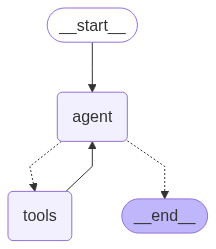

In [24]:
from IPython.display import Image, display

display(Image(recommender.get_graph().draw_mermaid_png()))

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["q", "exit", "quit"]:
        break

    response = recommender.invoke(
        {"messages": [{"role": "user", "content": user_input}]},
        config={"configurable": {"user_id": "user_123", "thread_id": "1"}}
    )

    for msg in response["messages"]:
        msg.pretty_print()